In [1]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy.sql.expression import and_, extract
from datetime import datetime, timedelta
import pandas as pd
from matplotlib import pyplot as plt

from pprint import pprint


In [2]:
Base = declarative_base()

In [3]:
class M(Base):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)

class Stations(Base):
    __tablename__ = "station"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

In [4]:
database_path = "Resources/hawaii.sqlite"
engine =  create_engine(f"sqlite:///{database_path}")
conn = engine.connect()
session = Session(bind=engine)

In [5]:
#find max date
max_date = session.query(func.max(M.date)).first()[0]
pprint(max_date)

datetime.date(2017, 8, 23)


In [6]:
one_year_ago = max_date - timedelta(days=365)
one_year_ago


datetime.date(2016, 8, 23)

In [7]:
my_data = session.query(M).filter(M.date >= one_year_ago,  M.date <= max_date)

pprint(type(my_data))
pprint(my_data)

all_info_df = pd.read_sql(my_data.statement, my_data.session.bind)
all_info_df

<class 'sqlalchemy.orm.query.Query'>


,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [8]:
my_data = session.query(M.prcp, M.date).filter(M.date >= one_year_ago,  M.date <= max_date)

pprint(type(my_data))
pprint(my_data)

prcp_date_df = pd.read_sql(my_data.statement, my_data.session.bind)
prcp_date_df

index_prcp_date_df = pd.read_sql(my_data.statement, my_data.session.bind).set_index("date")
index_prcp_date_df.head(25)

<class 'sqlalchemy.orm.query.Query'>


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


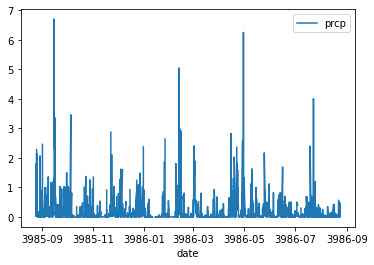

In [9]:
#Plot the results using the DataFrame `plot` method
#prcp_date_df.plot(figsize= (10,6))
index_prcp_date_df.plot()
plt.xticks()
plt.show()

In [10]:
prcp_date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
#from before ... not included with new work above^^

measurement_data = pd.read_sql("SELECT * FROM measurement" , conn)
measurement_data

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [12]:
data = engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
data

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
for row in data:
    print()

In [14]:
# ### Station Analysis

# * Design a query to calculate the total number of stations.
station_count = session.query(func.count(Stations.id)).first()[0]
print(station_count)
print(f"The total number of stations is {station_count}.")
print("-----------------------------------------------------")
# *Design a query to find the most active stations.
station_activity_count = session.query(M.station, func.count(M.station)).group_by(M.station).all()
print(station_activity_count)

s_activity = pd.read_sql("SELECT station, count(station) FROM measurement GROUP BY station" , conn)
most_active_station_df = s_activity.sort_values(by=['count(station)'], ascending = False)
one = most_active_station_df['station'][6]
two = most_active_station_df['station'][7]
three = most_active_station_df['station'][1]

print("-----------------------------------------------------")

most_active_station = session.query(func.max(M.station)).first()[0]

#print(most_active_station)
print(f"The most active station is {most_active_station}.")
print(f"The 3 most active stations in order by station name are {one}, {two}, {three}" )

print("-----------------------------------------------------")

most_active_station_df

9
The total number of stations is 9.
-----------------------------------------------------
[('USC00511918', 1979), ('USC00513117', 2709), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00517948', 1372), ('USC00518838', 511), ('USC00519281', 2772), ('USC00519397', 2724), ('USC00519523', 2669)]
-----------------------------------------------------
The most active station is USC00519523.
The 3 most active stations in order by station name are USC00519281, USC00519397, USC00513117
-----------------------------------------------------


,station,count(station)
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [30]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
recent_yr_tobs = session.query(M.tobs, M.date).filter(M.date >= one_year_ago,  M.date <= max_date)

tobs_df = pd.read_sql(recent_yr_tobs.statement, recent_yr_tobs.session.bind)
tobs_df

# Filter by the station with the highest number of observations: Includes TOBS plus date and station name.
my_data = session.query(M.tobs, M.date, M.station).filter(M.date >= one_year_ago,  M.date <= max_date, M.station == 'USC00519523')

most_active_station_tobs_df = pd.read_sql(my_data.statement, my_data.session.bind)
most_active_station_tobs_df

# Filter by the station with the highest number of observations: Includes only TOBS.
my_data = session.query(M.tobs).filter(M.date >= one_year_ago,  M.date <= max_date, M.station == 'USC00519523')

most_active_station_tobs_df = pd.read_sql(my_data.statement, my_data.session.bind)
most_active_station_tobs_df

,tobs
0,80.0
1,79.0
2,80.0
3,84.0
4,81.0
...,...
332,83.0
333,85.0
334,82.0
335,82.0


(array([ 2.,  3.,  0.,  3., 16., 17., 34., 60., 76., 72., 38., 16.]),
 array([60.        , 62.08333333, 64.16666667, 66.25      , 68.33333333,
        70.41666667, 72.5       , 74.58333333, 76.66666667, 78.75      ,
        80.83333333, 82.91666667, 85.        ]),
 <BarContainer object of 12 artists>)

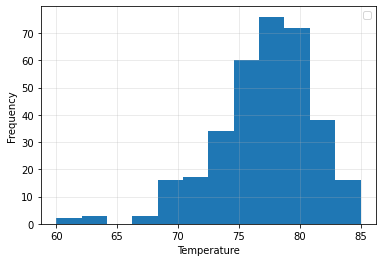

In [56]:
plt.grid(alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.hist(most_active_station_tobs_df['tobs'], bins=12, fill=True)



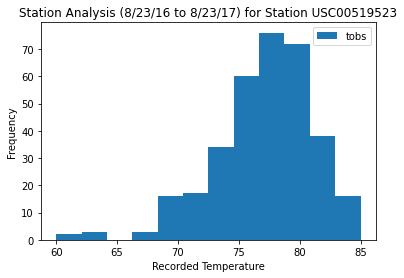

In [55]:
plt.hist(most_active_station_tobs_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/23/16 to 8/23/17) for Station " + most_active_station)
plt.legend(["tobs"])
plt.show()

In [16]:
measurement_data = pd.read_sql("SELECT * FROM station" , conn)
measurement_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [17]:
measurement_data = pd.read_sql("SELECT * FROM measurement" , conn)
measurement_data

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
